## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from module import *
from loss import *
from optimizer import *
from utils import *
from trainer import Trainer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pickle

np.random.seed(1)

## Linéaire

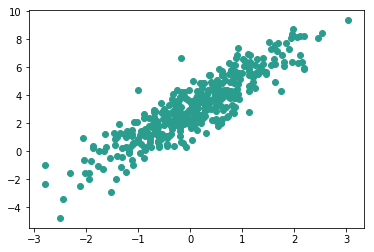

In [2]:
X = np.random.randn(400, 1)
Y = 2 * X + 3 + 1.01 * np.random.randn(400, 1)

plt.scatter(X[:, 0], Y[:, 0], c="#2a9d8f")
plt.savefig("../../plots/data_linear")

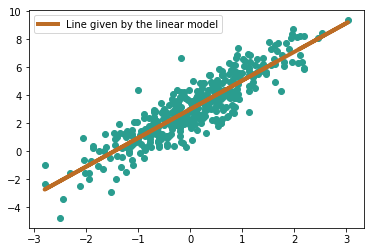

In [3]:
m = Linear(1, 1)
loss = MSELoss()
epochs = 1000
lr = 0.1

for epoch in range(epochs):
    yhat = m.forward(X)
    delta = loss.backward(Y, yhat) / 400
    m.backward_update_gradient(delta)
    m.update_parameters(gradient_step=lr)
    m.zero_grad()

plt.scatter(X[:, 0], Y[:, 0], c="#2a9d8f")
plt.plot(X, m.forward(X), c="#bc6c25", linewidth=4, label="Line given by the linear model")
plt.legend()
plt.savefig("../../plots/linear_regression")


## Sequential

In [4]:
X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


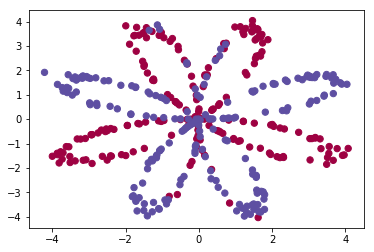

In [5]:
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)
plt.savefig("../../plots/planar_data")

In [8]:
X, Y = X.T, Y.T

Accuracy for 1 hidden units: 0.5
Accuracy for 2 hidden units: 0.4625


/home/khiemlk17/Documents/M1 S2 ANDROIDE/ML/project/src/module.py:136: RuntimeWarning: overflow encountered in exp
  self.output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))
/home/khiemlk17/Documents/M1 S2 ANDROIDE/ML/project/src/module.py:136: RuntimeWarning: invalid value encountered in true_divide
  self.output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))


Accuracy for 3 hidden units: 0.4


/home/khiemlk17/Documents/M1 S2 ANDROIDE/ML/project/src/module.py:136: RuntimeWarning: overflow encountered in exp
  self.output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))
/home/khiemlk17/Documents/M1 S2 ANDROIDE/ML/project/src/module.py:136: RuntimeWarning: invalid value encountered in true_divide
  self.output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))


Accuracy for 4 hidden units: 0.625
Accuracy for 5 hidden units: 0.5


/home/khiemlk17/Documents/M1 S2 ANDROIDE/ML/project/src/module.py:136: RuntimeWarning: overflow encountered in exp
  self.output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))
/home/khiemlk17/Documents/M1 S2 ANDROIDE/ML/project/src/module.py:136: RuntimeWarning: invalid value encountered in true_divide
  self.output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))


Accuracy for 20 hidden units: 0.5


/home/khiemlk17/Documents/M1 S2 ANDROIDE/ML/project/src/module.py:136: RuntimeWarning: overflow encountered in exp
  self.output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))
/home/khiemlk17/Documents/M1 S2 ANDROIDE/ML/project/src/module.py:136: RuntimeWarning: invalid value encountered in true_divide
  self.output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))


Accuracy for 50 hidden units: 0.4925


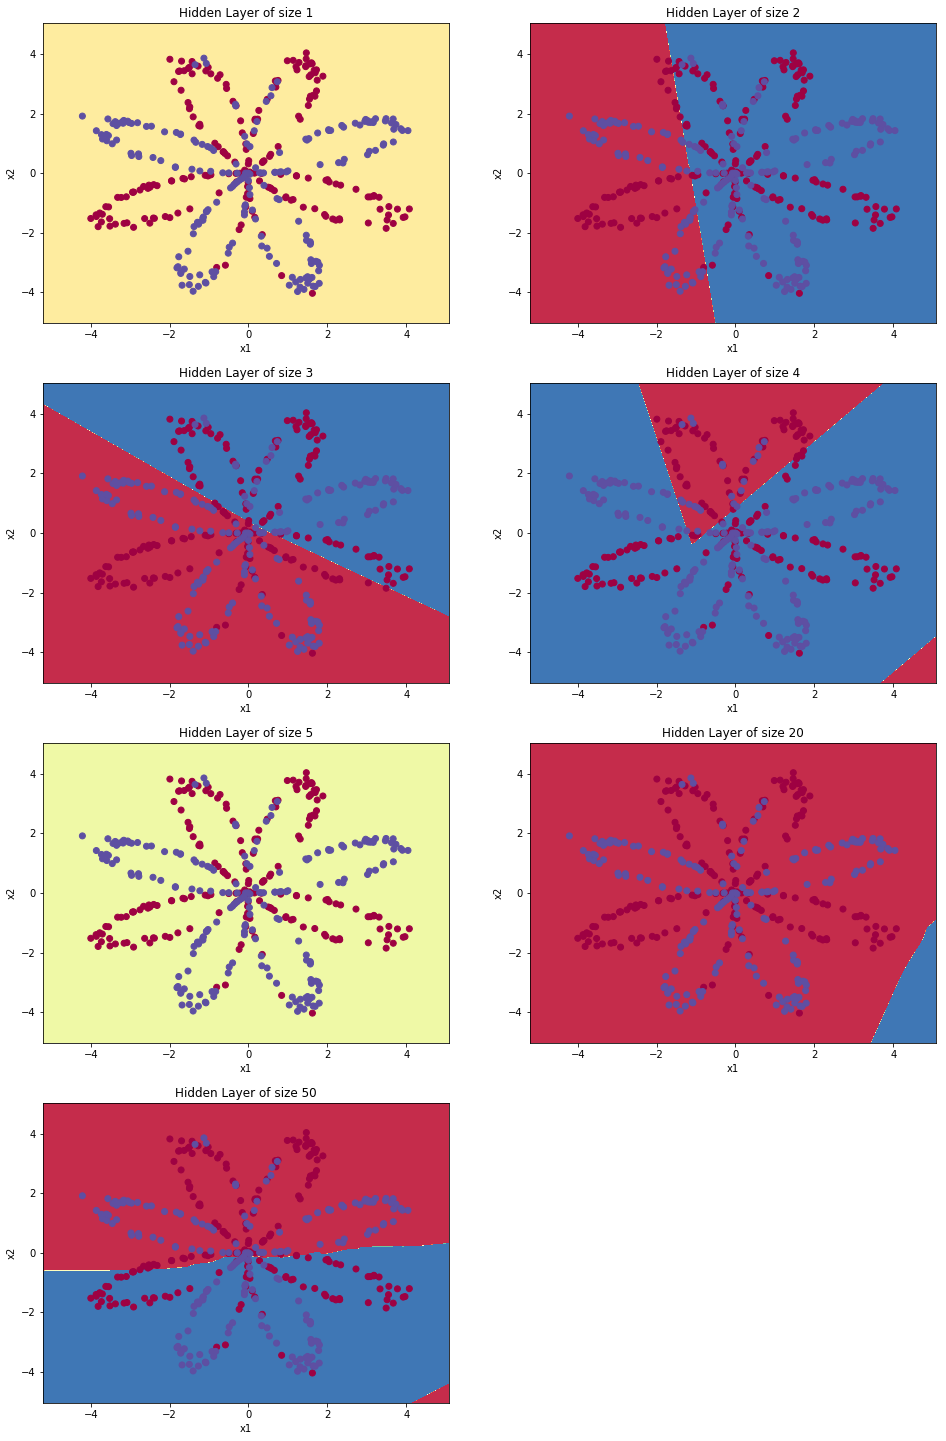

In [10]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
loss = BinaryCrossEntropyLoss()
n_epoch = 1000

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)

    m = Sequentiel(Linear(2, n_h), TanH(), Linear(n_h, 1))
    op = SGD(m, loss, lr=.1)
    for epoch in range(n_epoch):
        for batch in op.iterate_mini_batch(X, Y):
            batch_x, batch_y = batch
            op.step(batch_x, batch_y, epoch)
            op.zero_grad()

    m.add_layer(Sigmoid())
    plot_decision_boundary(lambda x: (m.forward(x) >= 0.5), X, Y)
    
    plt.savefig("../../plots/planar_classif")
    yhat = m.forward(X) >= 0.5
    print(f"Accuracy for {n_h} hidden units: {accuracy_score(Y, yhat)}")

Accuracy for 1 hidden units: 0.6825
Accuracy for 2 hidden units: 0.6775
Accuracy for 3 hidden units: 0.67
Accuracy for 4 hidden units: 0.9125
Accuracy for 5 hidden units: 0.9225
Accuracy for 20 hidden units: 0.9275
Accuracy for 50 hidden units: 0.9275


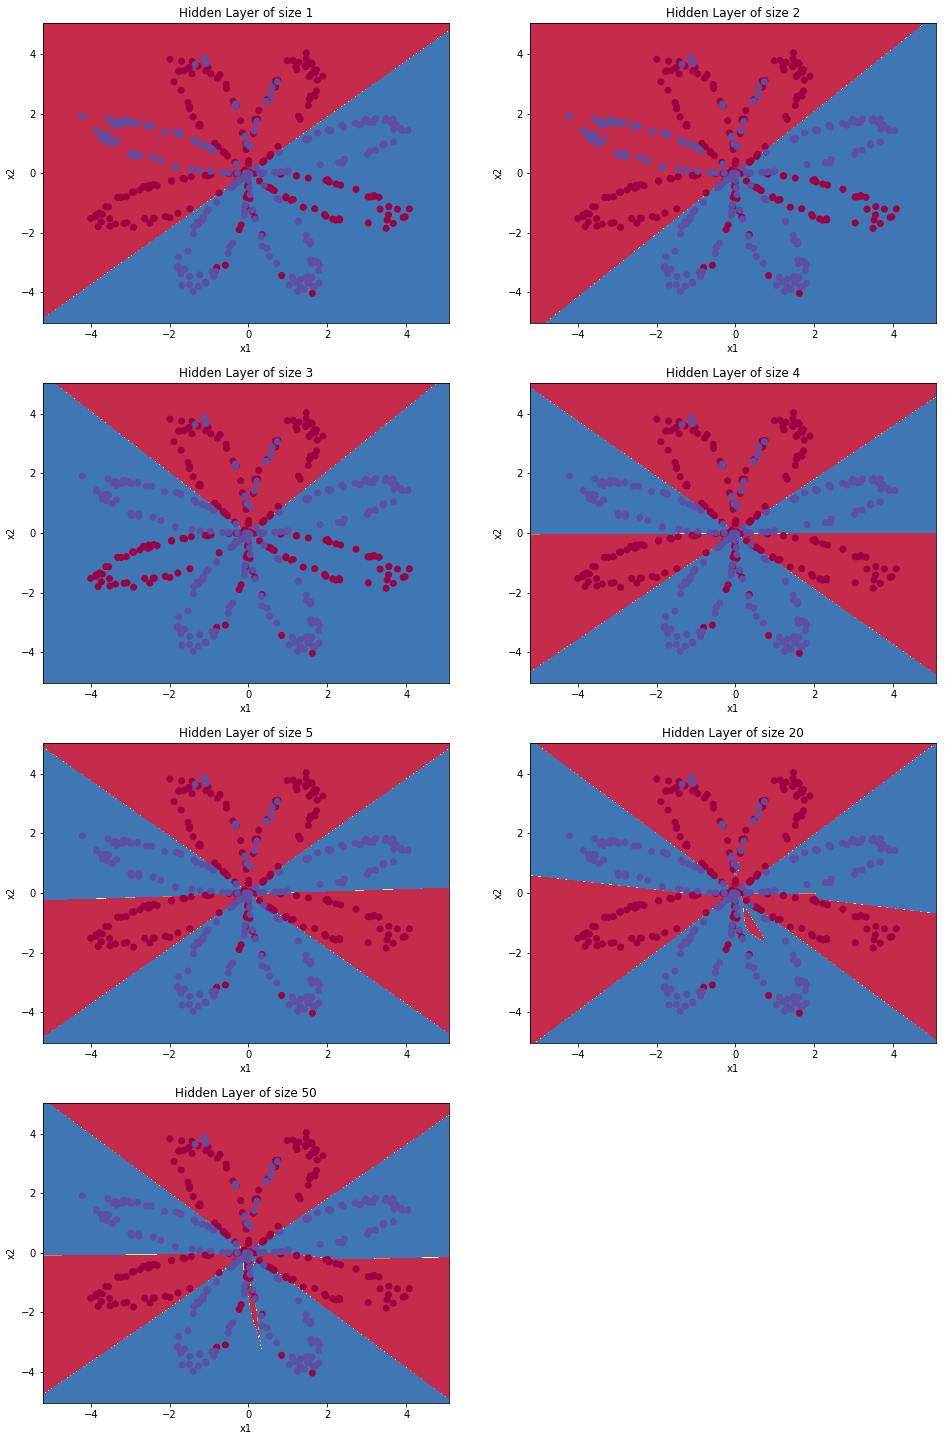

In [8]:
plt.figure(figsize=(16, 32))
n_epoch = 1000
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)

    m = Sequentiel(Linear(2, n_h), TanH(), Linear(n_h, 1))
    op = Adam(m, loss, lr=.1)
    for epoch in range(n_epoch):
        for batch in op.iterate_mini_batch(X, Y):
            batch_x, batch_y = batch
            op.step(batch_x, batch_y, epoch+1)
            op.zero_grad()

    m.add_layer(Sigmoid())
    plot_decision_boundary(lambda x: (m.forward(x) >= 0.5), X, Y)

    yhat = m.forward(X) >= 0.5
    print(f"Accuracy for {n_h} hidden units: {accuracy_score(Y, yhat)}")

## Multi classe

In [2]:
X, Y = load_usps("../../data/USPS_train.txt")

Y_onehot = one_hot(Y)

print(X.shape, Y.shape)

(7291, 256) (7291,)


In [3]:
x_train, x_val, y_train, y_val = train_test_split(X, Y_onehot, test_size=.2)

In [4]:
m = Sequentiel(Linear(256, 128), ReLU(), Linear(128, 64), ReLU(), Linear(64, 32), ReLU(), Linear(32, 10))
loss = CrossEntropy()

epochs = 100

op = SGD(m, loss, lr=.1)

trainer = Trainer(op, loss, 100, x_train, y_train, x_val, y_val)
train_loss, val_loss = trainer.run()

Epoch 0...
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(32, 128) (32, 128)
(32, 32) (32, 32)
(32, 64) (32, 64)
(

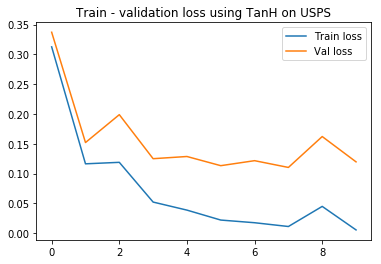

In [5]:
plt.plot(range(len(train_loss)), train_loss, label="Train loss")
plt.plot(range(len(val_loss)), val_loss, label="Val loss")
plt.title("Train - validation loss using TanH on USPS")
plt.legend()

In [6]:
X_test, Y_test = load_usps("../data/USPS_test.txt")

In [7]:
m.add_layer(SoftMax())

yhat = np.argmax(m.forward(X_test), axis=1)

accuracy_score(Y_test, yhat)

0.9382162431489786

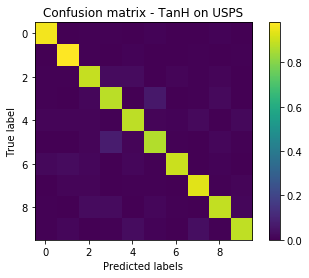

In [14]:
cm = confusion_matrix(Y_test, yhat)

fig = plt.figure()

plt.title("Confusion matrix - TanH on USPS")
plt.xlabel("Predicted labels")
plt.ylabel("True label")

im = plt.imshow(cm)

fig.colorbar(im)


In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")

In [4]:
X, Y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

# with open("../data/MNIST_data.npy", "wb") as f:
#     np.save(f, X)

# with open("../data/MNIST_label.npy", "wb") as f:
#     np.save(f, Y)

X = X / 255
Y = Y.astype("int")

In [5]:
X.shape

(70000, 784)

In [14]:
with open("../../archives/auto_encoder_ReLU/model", "rb") as f:
    m = pickle.load(f)

with open("../../archives/auto_encoder_TanH/train_loss", "rb") as f:
    train_loss = np.load(f)

with open("../../archives/auto_encoder_TanH/val_loss", "rb") as f:
    val_loss = np.load(f)

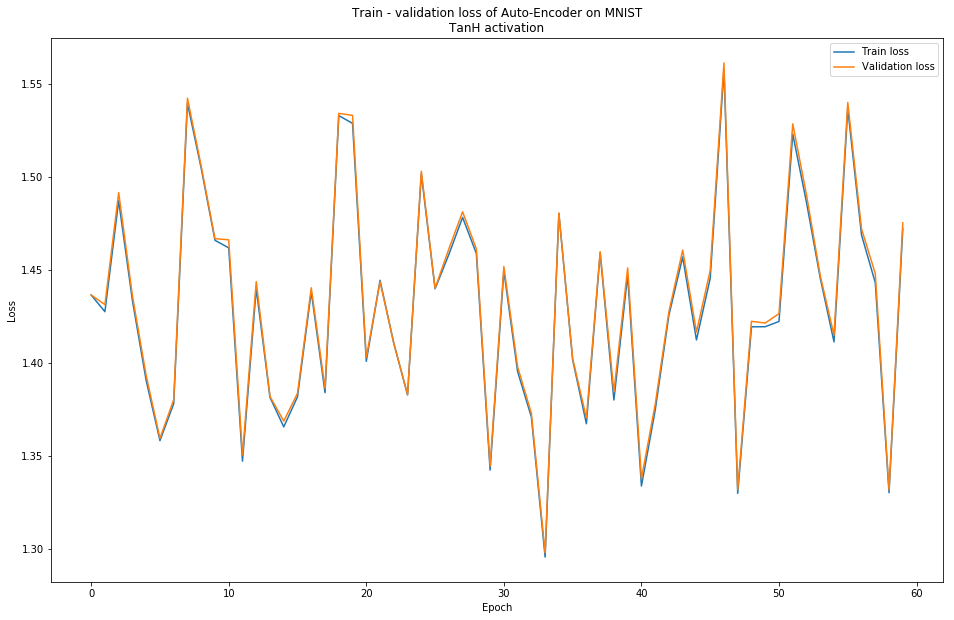

In [15]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(train_loss)), train_loss, label="Train loss")
plt.plot(range(len(val_loss)), val_loss, label="Validation loss")
plt.title(f"Train - validation loss of Auto-Encoder on MNIST\nTanH activation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig(f"../../plots/auto_encoder_loss_TanH")

<Figure size 432x288 with 0 Axes>

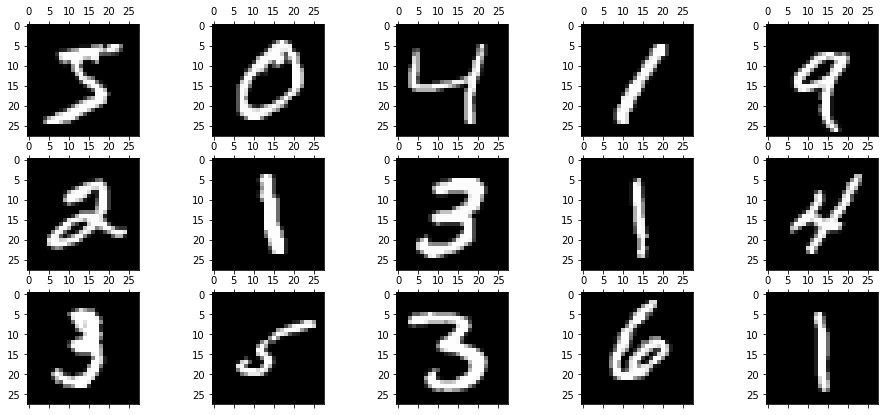

In [21]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.matshow(X[i].reshape((28, 28)).astype(float))

plt.savefig("../../plots/mnist_image_original")

In [22]:
X_decoded = m.forward(X)

In [9]:
X_decoded.shape

(70000, 784)

<Figure size 432x288 with 0 Axes>

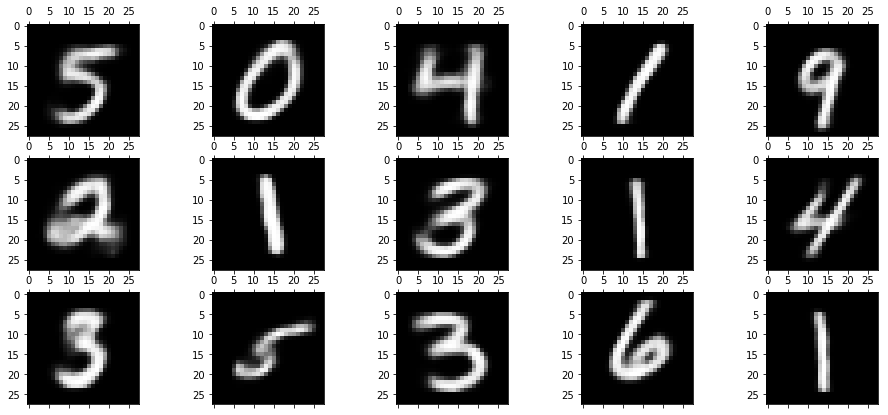

In [24]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.matshow(X_decoded[i].reshape((28, 28)).astype(float))

plt.savefig("../../plots/mnist_image_auto_encoder_ReLU")

In [29]:
with open("../../archives/auto_encoder_TanH/model", "rb") as f:
    m_TanH = pickle.load(f)

In [30]:
X_decoded_TanH = m.forward(X)

<Figure size 432x288 with 0 Axes>

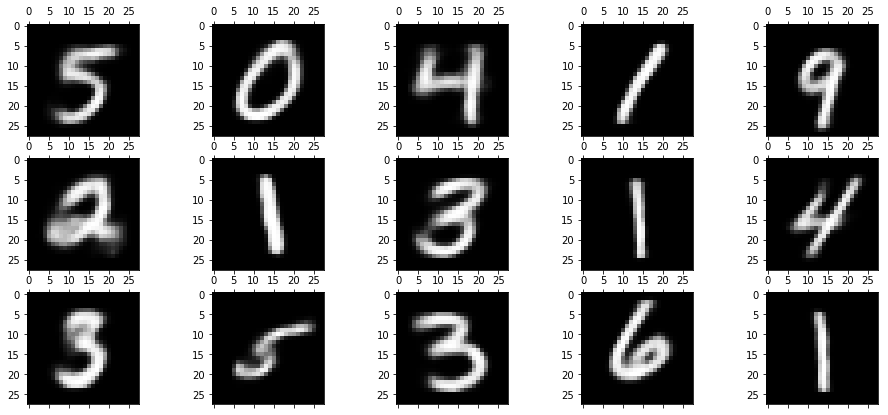

In [31]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.matshow(X_decoded_TanH[i].reshape((28, 28)).astype(float))

plt.savefig("../../plots/mnist_image_auto_encoder_TanH")

In [39]:
from copy import deepcopy

m_encoder_ReLU = deepcopy(m)

m_encoder_ReLU.layers = m_encoder_ReLU.layers[:8]

X_embedded_ReLU = m_encoder_ReLU.forward(X)

In [40]:
print(X_embedded_ReLU.shape)

(70000, 10)


In [41]:
m_encoder_TanH = deepcopy(m_TanH)

m_encoder_TanH.layers = m_encoder_TanH.layers[:8]

X_embedded_TanH = m_encoder_TanH.forward(X)

In [42]:
print(X_embedded_TanH.shape)

(70000, 10)


In [44]:
np.random.seed(42)
rndperm = np.random.permutation(70000)

In [45]:
from sklearn.manifold import TSNE

In [47]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_ReLU = tsne.fit_transform(X_embedded_ReLU[rndperm[:10000], :])

/home/khiemlk17/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/khiemlk17/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 1.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.252534
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.002396
[t-SNE] KL divergence after 300 iterations: 2.662059


In [51]:
import pandas as pd

df_ReLU = pd.DataFrame(tsne_results_ReLU, columns=["tsne-2d-one", "tsne-2d-two"])
df_ReLU["y"] = Y[rndperm[:10000]]

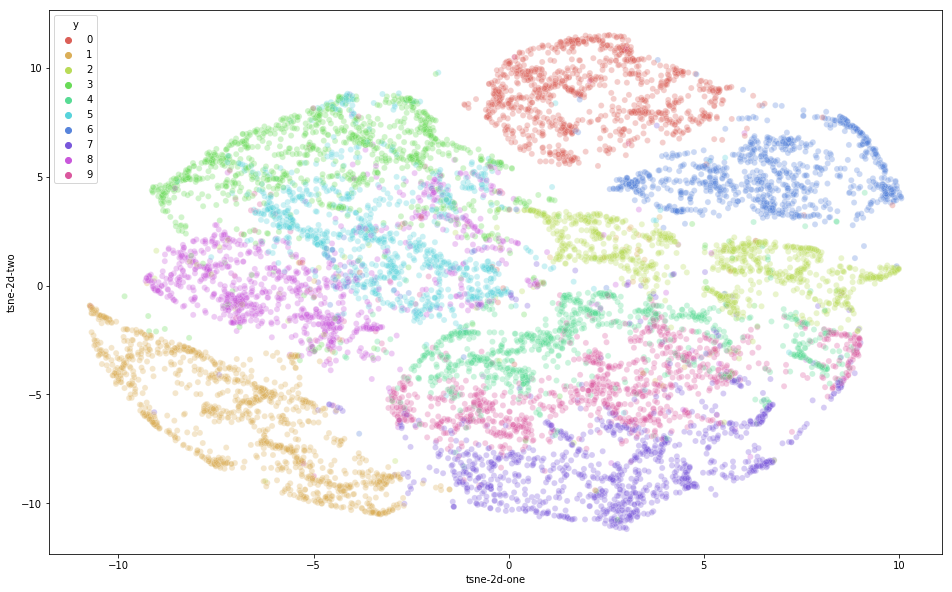

In [53]:
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_ReLU,
    legend="full",
    alpha=0.3
)

plt.savefig("../../plots/mnist_t-sne_ReLU.png")

In [56]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_TanH = tsne.fit_transform(X_embedded_TanH[rndperm[:10000], :])

/home/khiemlk17/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/khiemlk17/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 0.205s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000014
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.949341
[t-SNE] KL divergence after 300 iterations: 2.110955


In [59]:
df_TanH = pd.DataFrame(tsne_results_TanH, columns=["tsne-2d-one", "tsne-2d-two"])
df_TanH["y"] = Y[rndperm[:10000]]

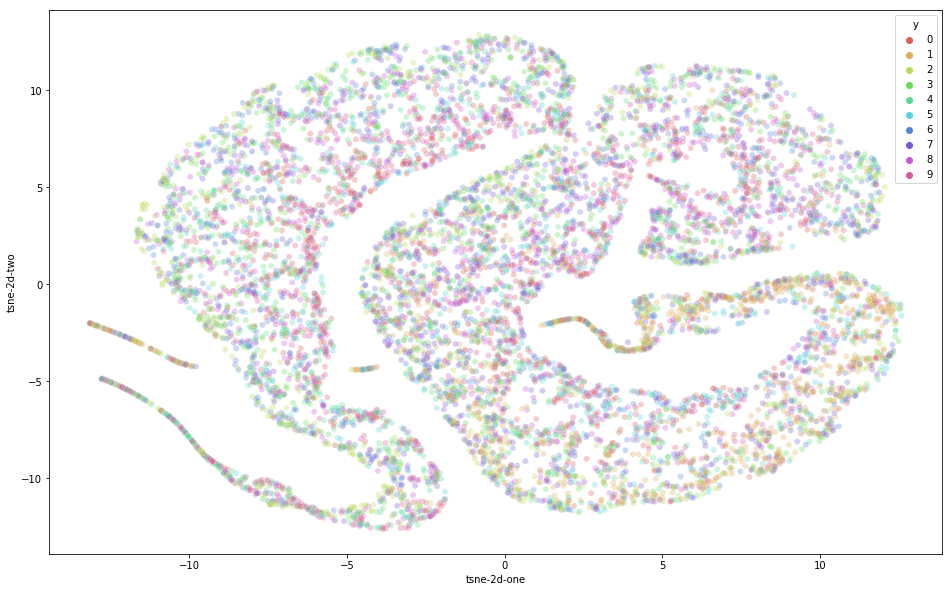

In [62]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_TanH,
    legend="full",
    alpha=0.3
)

plt.savefig("../../plots/mnist_t-sne_TanH.png")

In [71]:
X_embedded_ReLU_train, X_embedded_ReLU_test, Y_embedded_ReLU_train, Y_embedded_ReLU_test = train_test_split(X_embedded_ReLU, Y, test_size=.2)
X_embedded_ReLU_train, X_embedded_ReLU_val, Y_embedded_ReLU_train, Y_embedded_ReLU_val = train_test_split(X_embedded_ReLU_train, one_hot(Y_embedded_ReLU_train), test_size=.2)

In [72]:
m_classif_from_embedded_space_ReLU = Sequentiel(Linear(10, 20), ReLU(), Linear(20, 40), ReLU(), Linear(40, 10))
loss = CrossEntropy()

op = SGD(m_classif_from_embedded_space_ReLU, loss, lr=.1)

trainer = Trainer(op, loss, 50, X_embedded_ReLU_train, Y_embedded_ReLU_train, X_embedded_ReLU_val, Y_embedded_ReLU_val, early_stop=False)
train_loss, val_loss = trainer.run()

Epoch 0...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Epoch 5...
Epoch 6...
Epoch 7...
Epoch 8...
Epoch 9...
Epoch 10...
Epoch 11...
Epoch 12...
Epoch 13...
Epoch 14...
Epoch 15...
Epoch 16...
Epoch 17...
Epoch 18...
Epoch 19...
Epoch 20...
Epoch 21...
Epoch 22...
Epoch 23...
Epoch 24...
Epoch 25...
Epoch 26...
Epoch 27...
Epoch 28...
Epoch 29...
Epoch 30...
Epoch 31...
Epoch 32...
Epoch 33...
Epoch 34...
Epoch 35...
Epoch 36...
Epoch 37...
Epoch 38...
Epoch 39...
Epoch 40...
Epoch 41...
Epoch 42...
Epoch 43...
Epoch 44...
Epoch 45...
Epoch 46...
Epoch 47...
Epoch 48...
Epoch 49...


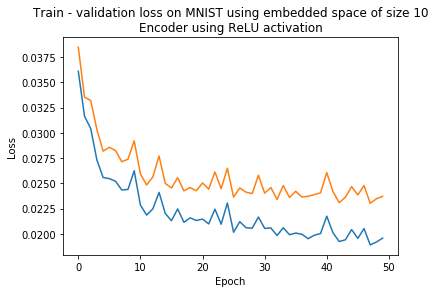

In [73]:
plt.figure()
plt.plot(range(len(train_loss)), train_loss, label="Train loss")
plt.plot(range(len(val_loss)), val_loss, label="Validation loss")
plt.title(f"Train - validation loss on MNIST using embedded space of size 10\nEncoder using ReLU activation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("../../plots/mnist_classif_from_embedded_ReLU")

In [75]:
m_classif_from_embedded_space_ReLU.add_layer(SoftMax())

yhat = m_classif_from_embedded_space_ReLU.forward(X_embedded_ReLU_test)
yhat = np.argmax(yhat, axis=1)

acc_test = accuracy_score(Y_embedded_ReLU_test, yhat)
print(acc_test)

0.9372857142857143


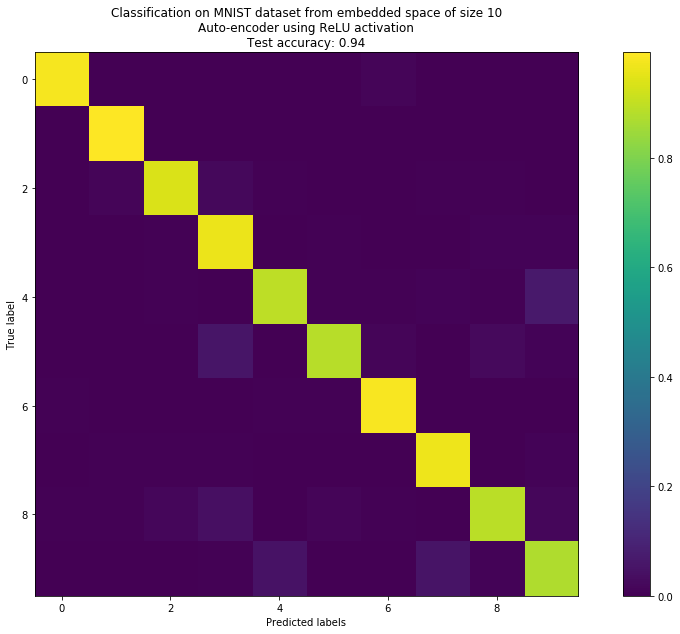

In [80]:
cm = confusion_matrix(Y_embedded_ReLU_test, yhat)

fig = plt.figure(figsize=(16, 10))

plt.title(f"Classification on MNIST dataset from embedded space of size 10\nAuto-encoder using ReLU activation\nTest accuracy: {acc_test:.2f}")
plt.xlabel("Predicted labels")
plt.ylabel("True label")

im = plt.imshow(cm, cmap="viridis")

fig.colorbar(im)

plt.savefig("../../plots/mnist_conf_mat_classif_from_embedded_ReLU")

In [81]:
X_embedded_TanH_train, X_embedded_TanH_test, Y_embedded_TanH_train, Y_embedded_TanH_test = train_test_split(X_embedded_TanH, Y, test_size=.2)
X_embedded_TanH_train, X_embedded_TanH_val, Y_embedded_TanH_train, Y_embedded_TanH_val = train_test_split(X_embedded_TanH_train, one_hot(Y_embedded_TanH_train), test_size=.2)

In [82]:
m_classif_from_embedded_space_TanH = Sequentiel(Linear(10, 20), ReLU(), Linear(20, 40), ReLU(), Linear(40, 10))
loss = CrossEntropy()

op = SGD(m_classif_from_embedded_space_TanH, loss, lr=.1)

trainer = Trainer(op, loss, 50, X_embedded_TanH_train, Y_embedded_TanH_train, X_embedded_TanH_val, Y_embedded_TanH_val, early_stop=False)
train_loss, val_loss = trainer.run()

Epoch 0...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Epoch 5...
Epoch 6...
Epoch 7...
Epoch 8...
Epoch 9...
Epoch 10...
Epoch 11...
Epoch 12...
Epoch 13...
Epoch 14...
Epoch 15...
Epoch 16...
Epoch 17...
Epoch 18...
Epoch 19...
Epoch 20...
Epoch 21...
Epoch 22...
Epoch 23...
Epoch 24...
Epoch 25...
Epoch 26...
Epoch 27...
Epoch 28...
Epoch 29...
Epoch 30...
Epoch 31...
Epoch 32...
Epoch 33...
Epoch 34...
Epoch 35...
Epoch 36...
Epoch 37...
Epoch 38...
Epoch 39...
Epoch 40...
Epoch 41...
Epoch 42...
Epoch 43...
Epoch 44...
Epoch 45...
Epoch 46...
Epoch 47...
Epoch 48...
Epoch 49...


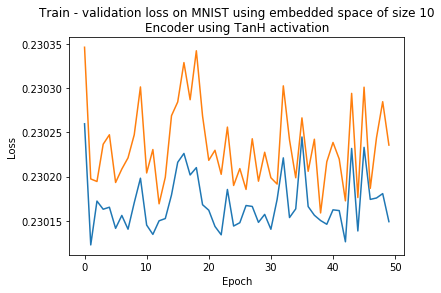

In [83]:
plt.figure()
plt.plot(range(len(train_loss)), train_loss, label="Train loss")
plt.plot(range(len(val_loss)), val_loss, label="Validation loss")
plt.title(f"Train - validation loss on MNIST using embedded space of size 10\nEncoder using TanH activation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("../../plots/mnist_classif_from_embedded_TanH")

In [84]:
m_classif_from_embedded_space_TanH.add_layer(SoftMax())

yhat = m_classif_from_embedded_space_TanH.forward(X_embedded_TanH_test)
yhat = np.argmax(yhat, axis=1)

acc_test = accuracy_score(Y_embedded_TanH_test, yhat)
print(acc_test)

0.11471428571428571


/home/khiemlk17/Documents/M1 S2 ANDROIDE/ML/project/src/utils.py:86: RuntimeWarning: invalid value encountered in true_divide
  C = C / np.sum(C, axis=1, keepdims=True)


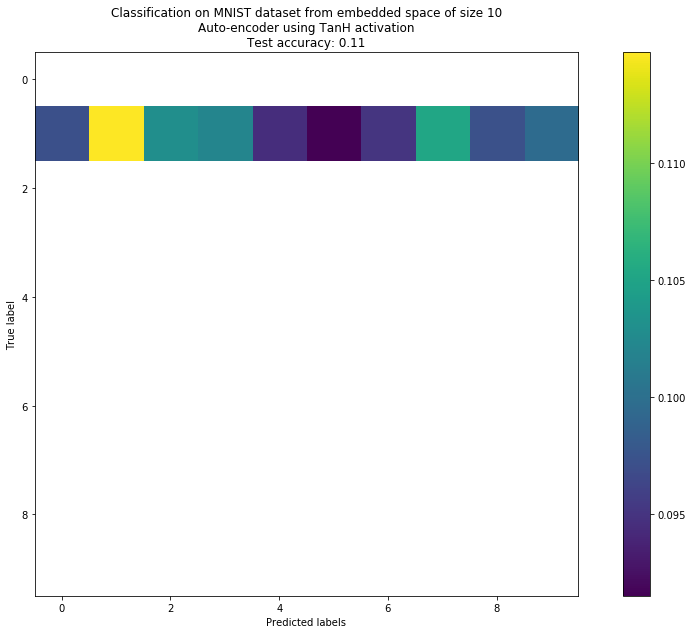

In [85]:
cm = confusion_matrix(Y_embedded_TanH_test, yhat)

fig = plt.figure(figsize=(16, 10))

plt.title(f"Classification on MNIST dataset from embedded space of size 10\nAuto-encoder using TanH activation\nTest accuracy: {acc_test:.2f}")
plt.xlabel("Predicted labels")
plt.ylabel("True label")

im = plt.imshow(cm, cmap="viridis")

fig.colorbar(im)

plt.savefig("../../plots/mnist_conf_mat_classif_from_embedded_TanH")

In [19]:
import torch

In [21]:
m = torch.nn.Sequential()

SyntaxError: invalid syntax (4274119998.py, line 6)

In [4]:
with open("../../archives/usps_cnn/model", "rb") as f:
    m = pickle.load(f)

with open("../../archives/usps_cnn/train_loss", "rb") as f:
    train_loss = np.load(f)

with open("../../archives/usps_cnn/val_loss", "rb") as f:
    val_loss = np.load(f)

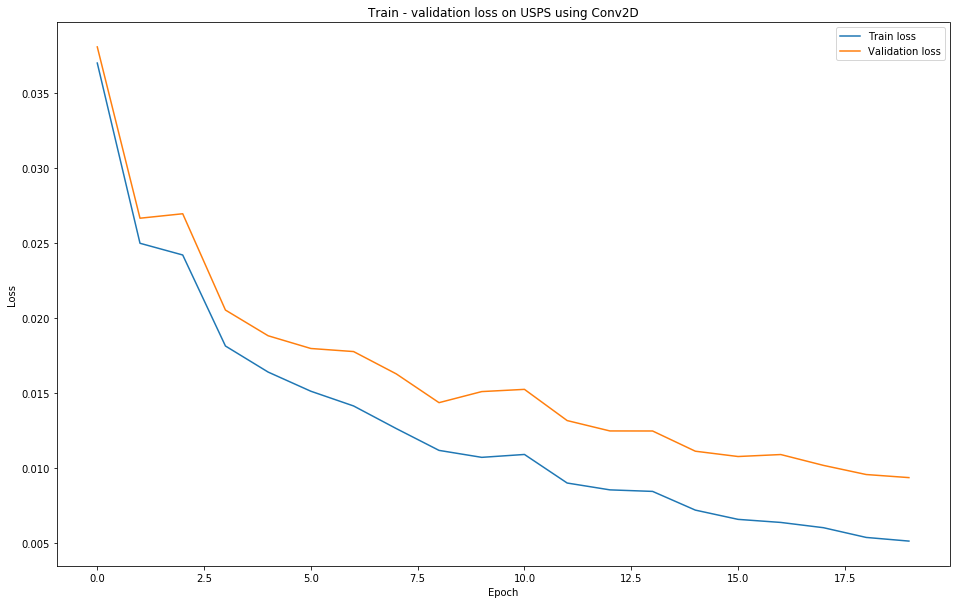

In [18]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(train_loss)), train_loss, label="Train loss")
plt.plot(range(len(val_loss)), val_loss, label="Validation loss")
plt.title(f"Train - validation loss on USPS using Conv2D")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.savefig("../plots/usps_cnn")

In [7]:
X = X.reshape(X.shape[0], 16, 16, 1)

yhat = m.forward(X)

In [9]:
yhat = np.argmax(yhat, axis=1)

In [11]:
acc = accuracy_score(Y, yhat)

print(acc)

0.9831298861610205


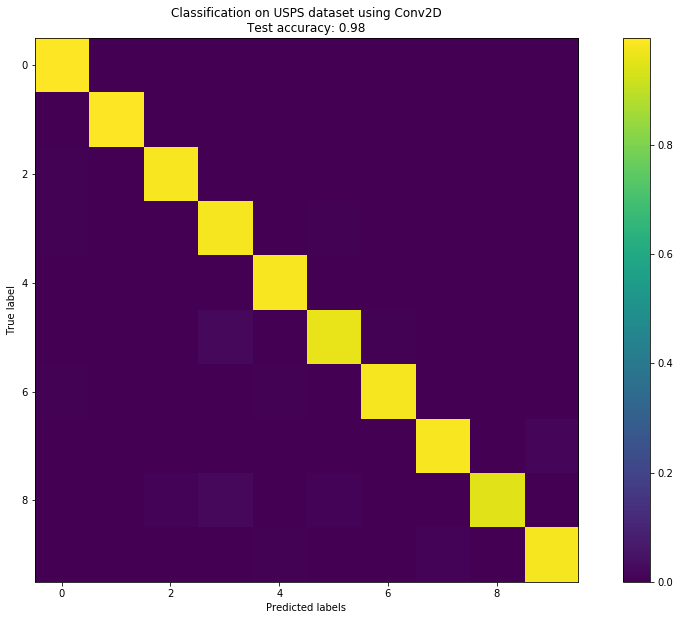

In [15]:
cm = confusion_matrix(Y, yhat)

fig = plt.figure(figsize=(16, 10))

plt.title(f"Classification on USPS dataset using Conv2D\nTest accuracy: {acc:.2f}")
plt.xlabel("Predicted labels")
plt.ylabel("True label")

im = plt.imshow(cm, cmap="viridis")

fig.colorbar(im)

plt.savefig("../plots/usps_cnn_conf_mat")